In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
from datetime import datetime
pd.options.display.max_rows = 999

## 1. Loading the Dataset and Saving into Smaller Size

In [ ]:
# df = pd.read_csv('numerai_tournament_data.csv')
# df.to_parquet('full_test_set.gzip')
print("Completed")

In [ ]:
# train_data = pd.read_csv('numerai_training_data.csv')
# train_data.to_parquet('train_data.gzip')
print("Completed")

In [20]:
train_data = pd.read_parquet('train_data.gzip')
train_data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,...,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.50
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,...,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,...,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.25
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,...,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.25
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,...,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


In [ ]:
train_data.shape

In [ ]:
#Check proportion of target values
train_data.target.value_counts()

#### b. Feature Engineering

In [4]:
# The features are grouped together into 6 types
feature_groups = {
    g: [c for c in train_data if c.startswith(f"feature_{g}")]
    for g in ["intelligence", "wisdom", "charisma", "dexterity", "strength", "constitution"]
}
feature_groups

{'intelligence': ['feature_intelligence1',
  'feature_intelligence2',
  'feature_intelligence3',
  'feature_intelligence4',
  'feature_intelligence5',
  'feature_intelligence6',
  'feature_intelligence7',
  'feature_intelligence8',
  'feature_intelligence9',
  'feature_intelligence10',
  'feature_intelligence11',
  'feature_intelligence12'],
 'wisdom': ['feature_wisdom1',
  'feature_wisdom2',
  'feature_wisdom3',
  'feature_wisdom4',
  'feature_wisdom5',
  'feature_wisdom6',
  'feature_wisdom7',
  'feature_wisdom8',
  'feature_wisdom9',
  'feature_wisdom10',
  'feature_wisdom11',
  'feature_wisdom12',
  'feature_wisdom13',
  'feature_wisdom14',
  'feature_wisdom15',
  'feature_wisdom16',
  'feature_wisdom17',
  'feature_wisdom18',
  'feature_wisdom19',
  'feature_wisdom20',
  'feature_wisdom21',
  'feature_wisdom22',
  'feature_wisdom23',
  'feature_wisdom24',
  'feature_wisdom25',
  'feature_wisdom26',
  'feature_wisdom27',
  'feature_wisdom28',
  'feature_wisdom29',
  'feature_wisdom

In [4]:
#Saving Initial Columns
initial_cols = train_data.columns

#### b.1. Engineer Addtition, min/max/mean/median of Same Group

In [ ]:
for group in feature_groups:
    new_feats = "add_" + group[0:3]
    train_data[new_feats] = 0
    for column in feature_groups[group]:
        train_data[new_feats] = train_data[new_feats] + train_data[column]
        
train_data.head()

In [ ]:
for group in feature_groups:
    new_feats_1 = "min_" + group[0:3]
    new_feats_2 = "max_" + group[0:3]
    new_feats_3 = "mean_" + group[0:3]
    new_feats_4 = "median_" + group[0:3]
         
    train_data[new_feats_1] = train_data.loc[:,feature_groups[group]].min(axis=1)
    train_data[new_feats_2] = train_data.loc[:,feature_groups[group]].max(axis=1)
    train_data[new_feats_3] = train_data.loc[:,feature_groups[group]].mean(axis=1)
    train_data[new_feats_4] = train_data.loc[:,feature_groups[group]].median(axis=1)

train_data.head()

Save into dataframe for lesser memory usage

In [ ]:
# feat_eng_p1 = train_data.loc[:,train_data.columns[314:]]
# feat_eng_p1.to_parquet('feat_eng_p1.gzip')
print("Completed")

#### b.2. Engineer Cross Multiplication of Features

In [18]:
from itertools import combinations_with_replacement

count = 0
added_feats = []
for group in ["charisma"]:
    group_corr = train_data.loc[:,feature_groups[group]].corr()
    
    for p in combinations_with_replacement(group_corr.columns,2):
        if group_corr.loc[p[0],p[1]] > 0.5 and group_corr.loc[p[0],p[1]] <1:
            train_data[p[0][8:11] + p[0][-2:] +"_"+p[1][8:11]+p[1][-2:]] = train_data[p[0]]*train_data[p[1]]
#             added_feats.append(p[0][8:11] + p[0][-2:] +"_"+p[1][8:11]+p[1][-2:])
            count += 1
            print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142


In [19]:
feat_eng_p3 = train_data.loc[:,train_data.columns[314:]]
feat_eng_p3.to_parquet('feat_eng_p3.gzip')
print("Completed")

Completed


In [16]:
len(added_feats)

142

In [17]:
train_data.shape

(501808, 314)

In [3]:
from itertools import combinations_with_replacement

count = 0 
for p in combinations_with_replacement(train_data.columns[3:],2):
        if p[0] != p[1] and p[0][8:11] != p[1][8:11]:
            train_data[p[0][8:11] + p[0][-2:] +"_"+p[1][8:11]+p[1][-2:]] = train_data[p[0]]*train_data[p[1]]
            count+=1
            print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [ ]:
len(title)

In [ ]:
title[:-10]

In [ ]:
combi_check

In [ ]:
combi_str[:1000]

In [22]:
x=1

# Train Test Splitting and Saving into a Smaller File

In [21]:
feat_eng_p1 = pd.read_parquet('feat_eng_p1.gzip')
feat_eng_p2 = pd.read_parquet('feat_eng_p2.gzip')
feat_eng_p3 = pd.read_parquet('feat_eng_p3.gzip')

In [24]:
train_data = pd.concat([train_data,feat_eng_p1,feat_eng_p2,feat_eng_p3],axis=1)
del feat_eng_p1
del feat_eng_p2
del feat_eng_p3
train_data.head(2)

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,cha63_cha70,cha63_cha85,cha67_cha71,cha67_cha76,cha67_cha81,cha68_cha82,cha70_cha85,cha71_cha75,cha76_cha81,cha84_cha86
0,n000315175b67977,era1,train,0.0,0.5,0.25,0.00,0.5,0.25,0.25,...,0.25,0.2500,0.125,0.125,0.125,0.125,0.25,0.25,0.25,0.375
1,n0014af834a96cdd,era1,train,0.0,0.0,0.00,0.25,0.5,0.00,0.00,...,0.00,0.0625,0.250,0.500,0.500,0.375,0.00,0.25,1.00,0.250


In [25]:
train_data.shape

(501808, 639)

In [26]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['id','era','data_type','target'],axis=1)
y = train_data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

y_train = y_train.map({0.00:0, 0.25:1,0.50:2,0.75:3,1.00:4})
y_test = y_test.map({0.00:0, 0.25:1,0.50:2,0.75:3,1.00:4})

# X_train.to_parquet('X_train_020.gzip')
# X_test.to_parquet('X_test_020.gzip')
# y_train.to_pickle('y_train_020.pkl')
# y_test.to_pickle('y_test_020.pkl')

print("Completed")

Completed


In [27]:
del train_data
del X
del y

# Experiment on all training data

#### a. Loading X train/test and Y train/test

In [ ]:
X_train = pd.read_parquet('X_train_020.gzip')
X_test = pd.read_parquet('X_test_020.gzip')
y_train = pd.read_pickle('y_train_020.pkl')
y_test = pd.read_pickle('y_test_020.pkl')

# RFC Hyperparam Tuning

In [ ]:
# def rfc_pred(param,X_train,X_test,y_train,y_test):
    
#     from sklearn.ensemble import RandomForestClassifier
    
#     result = []
    
#     for depth in param:
#         model = RandomForestClassifier(n_estimators=100,max_depth=depth,class_weight="balanced",random_state=123)
#         model.fit(X_train,y_train)

#         y_train_pred = model.predict(X_train) 
#         y_test_pred = model.predict(X_test)

#         y_train_pred = pd.Series(y_train_pred)
#         y_test_pred = pd.Series(y_test_pred)

#         y_train_copy = y_train.copy()
#         y_test_copy = y_test.copy()
#         y_train_copy.reset_index(drop=True,inplace=True)
#         y_test_copy.reset_index(drop=True,inplace=True)

#         result.append([depth, round(model.score(X_train,y_train),5),round(model.score(X_test,y_test),5),\
#                        round(y_train_pred.corr(y_train_copy),5),round(y_test_pred.corr(y_test_copy),5)])

#     return result
    

In [43]:
from sklearn.ensemble import RandomForestClassifier
    
result = []

model = RandomForestClassifier(n_estimators=100,max_depth=9,class_weight="balanced",random_state=123)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train) 
y_test_pred = model.predict(X_test)

y_train_pred = pd.Series(y_train_pred)
y_test_pred = pd.Series(y_test_pred)

y_train_copy = y_train.copy()
y_test_copy = y_test.copy()
y_train_copy.reset_index(drop=True,inplace=True)
y_test_copy.reset_index(drop=True,inplace=True)

result.append([9, round(model.score(X_train,y_train),5),round(model.score(X_test,y_test),5),\
               round(y_train_pred.corr(y_train_copy),5),round(y_test_pred.corr(y_test_copy),5)])

In [44]:
result

[[9, 0.36112, 0.33935, 0.10909, 0.01321]]

In [41]:
X_train.columns[:26]

Index(['add_str', 'add_con', 'min_int', 'max_int', 'mean_int', 'median_int',
       'min_wis', 'max_wis', 'mean_wis', 'median_wis', 'min_cha', 'max_cha',
       'mean_cha', 'median_cha', 'min_dex', 'max_dex', 'mean_dex',
       'median_dex', 'min_str', 'max_str', 'mean_str', 'median_str', 'min_con',
       'max_con', 'mean_con', 'median_con'],
      dtype='object')

In [42]:
X_train = X_train.loc[:,X_train.columns[:26]]
X_test = X_test.loc[:,X_test.columns[:26]]

In [11]:
pickle.dump(model, open("basic_rfc_n100_d9.sav",'wb'))
# pickle.load('basic_rfc_n100_d9.sav')

In [31]:
feat_im = model.feature_importances_
feat_im

array([3.12538896e-02, 8.49212660e-04, 1.43772787e-03, 3.75026795e-02,
       4.49770881e-04, 6.55296294e-04, 4.48854431e-04, 5.60556898e-02,
       1.57918801e-03, 1.79470425e-03, 5.90873568e-03, 5.26763406e-04,
       4.92627447e-04, 3.84089652e-04, 4.55802060e-04, 4.94357988e-04,
       4.17925312e-04, 4.22763020e-04, 5.34844560e-04, 4.06920437e-04,
       5.15541973e-04, 4.48109115e-04, 6.19784633e-04, 3.96082837e-04,
       4.22281473e-04, 3.69829311e-04, 5.02041262e-04, 3.52513341e-04,
       3.95832175e-04, 4.46350440e-04, 5.13982698e-04, 4.57891439e-04,
       9.50820149e-04, 3.51401092e-04, 4.42732699e-04, 5.24040333e-04,
       4.45720924e-04, 4.81264605e-04, 1.12590975e-03, 8.32868565e-04,
       3.51778318e-04, 4.04101185e-04, 3.10071544e-04, 4.07133621e-04,
       3.62174598e-04, 4.61725098e-04, 3.28398878e-04, 2.72340203e-03,
       4.85731843e-04, 4.23173880e-04, 4.21148286e-04, 3.70408933e-04,
       5.64070495e-04, 3.80308895e-04, 4.47994344e-04, 5.59661777e-04,
      

In [ ]:
train_data.loc[:,feature_groups['charisma']].corr()

In [32]:
x = train_data.loc[:,feature_groups['wisdom']].corr()

In [36]:
x[(x.feature_wisdom1 < 1) & (x.feature_wisdom1 > 0.5)].index

Index(['feature_wisdom13', 'feature_wisdom14', 'feature_wisdom17',
       'feature_wisdom19', 'feature_wisdom20', 'feature_wisdom29',
       'feature_wisdom34', 'feature_wisdom35'],
      dtype='object')

In [37]:
x.columns

Index(['feature_wisdom1', 'feature_wisdom2', 'feature_wisdom3',
       'feature_wisdom4', 'feature_wisdom5', 'feature_wisdom6',
       'feature_wisdom7', 'feature_wisdom8', 'feature_wisdom9',
       'feature_wisdom10', 'feature_wisdom11', 'feature_wisdom12',
       'feature_wisdom13', 'feature_wisdom14', 'feature_wisdom15',
       'feature_wisdom16', 'feature_wisdom17', 'feature_wisdom18',
       'feature_wisdom19', 'feature_wisdom20', 'feature_wisdom21',
       'feature_wisdom22', 'feature_wisdom23', 'feature_wisdom24',
       'feature_wisdom25', 'feature_wisdom26', 'feature_wisdom27',
       'feature_wisdom28', 'feature_wisdom29', 'feature_wisdom30',
       'feature_wisdom31', 'feature_wisdom32', 'feature_wisdom33',
       'feature_wisdom34', 'feature_wisdom35', 'feature_wisdom36',
       'feature_wisdom37', 'feature_wisdom38', 'feature_wisdom39',
       'feature_wisdom40', 'feature_wisdom41', 'feature_wisdom42',
       'feature_wisdom43', 'feature_wisdom44', 'feature_wisdom45',
    

In [38]:
x.loc["feature_wisdom1","feature_wisdom13"]

0.5919693320622296

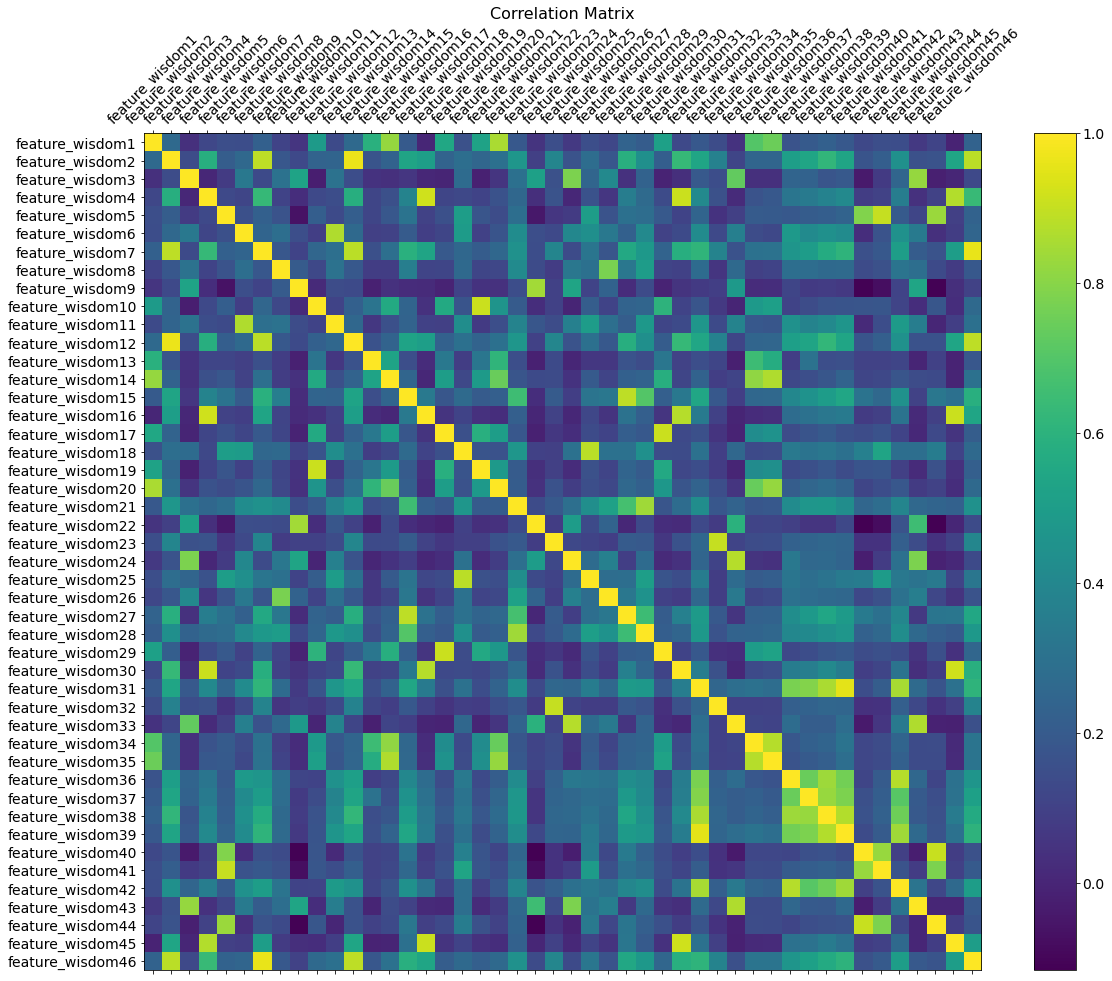

In [28]:
df = train_data.loc[:,feature_groups['wisdom']]

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [ ]:
temp_df = pd.DataFrame(data=train_data.columns[4:],columns=['Feature'])
temp_df2 = pd.DataFrame(data=feat_im,columns=['Importance'])
temp_concat = pd.concat([temp_df,temp_df2],axis=1)
temp_concat.head(70)

In [ ]:
rfc_pred([9],X_train,X_test,y_train,y_test)

In [ ]:
rfc_predict = pd.read_pickle('rfc_results_all_020_maxdepth.pkl')
rfc_predict

In [ ]:
rfc_predict = pd.read_pickle('rfc_kfold5_all_020_depth9.pkl')
rfc_predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

df = pd.read_parquet('train_data.gzip')

X = df.drop(['id','era','data_type','target'],axis=1)
y = df.target

y = y.map({0.00:0, 0.25:1,0.50:2,0.75:3,1.00:4})

model = RandomForestClassifier(n_estimators=100,max_depth=9,class_weight="balanced",random_state=123)
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

results=[]

for (train, test), i in zip(cv.split(X, y), range(5)):
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = pd.Series(y_train_pred)
    y_test_pred = pd.Series(y_test_pred)

    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()
    y_train_copy.reset_index(drop=True,inplace=True)
    y_test_copy.reset_index(drop=True,inplace=True)
    
    results.append([i,round(model.score(X_train,y_train),5),round(model.score(X_test,y_test),5),\
                       round(y_train_pred.corr(y_train_copy),5),round(y_test_pred.corr(y_test_copy),5)])

In [ ]:
results_df.to_pickle('rfc_results_all_020_maxdepth.pkl')

In [ ]:
results_df = pd.DataFrame(data=results,columns=["kfold","train_score","test_score","train_corr","test_corr"])
results_df

In [ ]:
results_df.to_pickle('rfc_kfold5_all_020_depth9.pkl')

In [ ]:
results_df = pd.read_pickle('rfc_results_all_020_maxdepth.pkl')
results_df

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

for (train, test), i in zip(cv.split(X, y), range(1)):
    x_train = train
    x_test = test
    
#     X_train = X.iloc[train]
#     y_train = y.iloc[train]
#     X_test = X.iloc[~train]
#     y_test = y.iloc[~train]
    

In [ ]:
def xgboost_pred(X_train,X_test,y_train,y_test):
    
    from xgboost import XGBClassifier
    
    result = []

    model = XGBClassifier(eta=0.4, max_depth=7, min_child_weight = 1, random_state=0,\
                          grow_policy = "lossguide", eval_metric = "mlogloss", objective="multi:softmax",\
                          num_class=5)

#         sample_type='weighted',feature_selector='cyclic',\

    model.fit(X_train,y_train)

    y_train_pred = model.predict_proba(X_train) #will give an output of probability of each classes
    y_test_pred = model.predict_proba(X_test)

    y_train_pred_adj = []
    y_test_pred_adj = []

    for i in range(len(y_train_pred)):
        if y_train_pred[i].argmax() == 0:
            y_train_pred_adj.append(0.00)
        elif y_train_pred[i].argmax() == 1:
            y_train_pred_adj.append(0.25)
        elif y_train_pred[i].argmax() == 2:
            y_train_pred_adj.append(0.50)
        elif y_train_pred[i].argmax() == 3:
            y_train_pred_adj.append(0.75)
        else:
            y_train_pred_adj.append(1.00)

    for i in range(len(y_test_pred)):
        if y_test_pred[i].argmax() == 0:
            y_test_pred_adj.append(0.00)
        elif y_test_pred[i].argmax() == 1:
            y_test_pred_adj.append(0.25)
        elif y_test_pred[i].argmax() == 2:
            y_test_pred_adj.append(0.50)
        elif y_test_pred[i].argmax() == 3:
            y_test_pred_adj.append(0.75)
        else:
            y_test_pred_adj.append(1.00)

    y_train_pred_adj = pd.Series(y_train_pred_adj)
    y_test_pred_adj = pd.Series(y_test_pred_adj)

    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()
    y_train_copy.reset_index(drop=True,inplace=True)
    y_test_copy.reset_index(drop=True,inplace=True)

    result.append([y_train_pred_adj.corr(y_train_copy),y_test_pred_adj.corr(y_test_copy)])

    return result
    

In [ ]:
xgboost_pred(X_train,X_test,y_train,y_test)

In [ ]:
xgboost_pred(model,6,X_train,X_test,y_train,y_test)

In [ ]:
result2 = [[0.35,0.8523608025312785, 0.004537041897319825],
 [0.375,0.8718657277426665, 0.006132192101997824],
 [0.425,0.9020533314569592, 0.006048008970637242],
 [0.45,0.9099207601325763, 0.007321830973244737]]

In [ ]:
xgboost_pred(model,7,X_train,X_test,y_train,y_test)

In [ ]:
result_df2= pd.DataFrame(data=result2,columns=['eta','train_corr','test_corr'])
result_df2

In [ ]:
result_df3 = pd.concat([result_df,result_df2],axis=0)
result_df3.reset_index(drop=True,inplace=True)
result_df3.sort_values('eta',inplace=True)
result_df3

In [ ]:
result_df = pd.DataFrame(data=result,columns=['eta','train_corr','test_corr'])
result_df

In [ ]:
#add_result.to_pickle('rf_corr_table_025.pkl')
#add_result.to_pickle('rf_corr_table_020.pkl')
#result_df.to_pickle('rf_corr_table_080.pkl')
# result_df.to_pickle('xgb_corr_table_080_maxdepth.pkl')
# result_df.to_pickle('xgb_corr_table_080_minchildweight.pkl')
result_df3.to_pickle('xgb_corr_table_080_eta.pkl')

In [ ]:
result_df = pd.read_pickle('rf_corr_table_020.pkl')
result_df

In [ ]:
result_df = pd.read_pickle('rf_corr_table_080.pkl')
result_df


# Removing less important features

In [ ]:
X = train_data.copy()
X.head(2)

In [ ]:
val_cnt = []
for col in range(3,len(X.columns)):
    x = X[X.columns[col]].value_counts().reset_index().sort_values('index')
    val_cnt.append([X.columns[col],x.iloc[0,1],x.iloc[1,1],x.iloc[2,1],x.iloc[3,1],x.iloc[4,1]])

In [ ]:
value_cnt_df = pd.DataFrame(data=val_cnt, columns=['feature','0.00','0.25','0.50','0.75','1.00'])
value_cnt_df

In [ ]:
###Trial Using Random Forest###
from sklearn.ensemble import RandomForestClassifier

X_train = pd.read_parquet('X_train_080.gzip')
X_test = pd.read_parquet('X_test_080.gzip')
y_train = pd.read_pickle('y_train_080.pkl')
y_test = pd.read_pickle('y_test_080.pkl')

y_train = y_train.map({0.00:0, 0.25:1,0.50:2,0.75:3,1.00:4})
y_test = y_test.map({0.00:0, 0.25:1,0.50:2,0.75:3,1.00:4})

rf = RandomForestClassifier(n_estimators=100,max_depth=9,class_weight="balanced")
rf.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred = pd.Series(y_train_pred)
y_test_pred = pd.Series(y_test_pred)

y_train_copy = y_train.copy()
y_test_copy = y_test.copy()
y_train_copy.reset_index(drop=True,inplace=True)
y_test_copy.reset_index(drop=True,inplace=True)

result=[]
result.append([y_train_pred.corr(y_train_copy),y_test_pred.corr(y_test_copy)])

result

In [ ]:
rf.feature_importances_

In [ ]:
to_remove = []

for i,v in enumerate(importance):
    if v <=0:
        to_remove.append(i)
        
to_remove[0:10]


In [ ]:
X.columns

In [ ]:
to_remove[0:10]

In [ ]:
X_remove = X.drop([x for x in X.columns[to_remove]],axis=1)
X_remove.head(2)

In [ ]:
X_remove.shape

In [ ]:
#Train test split for feature importance
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_remove,y,test_size=0.25,random_state=123)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

In [ ]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# get importance
importance = lr_model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.7f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lr_model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lr_model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [ ]:
to_remove = []

for i,v in enumerate(importance):
    if v <=0:
        to_remove.append(i)

X_remove = X_remove.drop([x for x in X_remove.columns[to_remove]],axis=1)
X_remove.head(2)

In [ ]:
X_remove.shape

In [ ]:
#Train test split for feature importance
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_remove,y,test_size=0.25,random_state=21)

# linear regression feature importance
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# get importance
importance = lr_model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.7f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lr_model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lr_model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [ ]:
from xgboost import XGBClassifier

model = XGBRegressor()
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
print(model.score(X_test, y_test))

In [ ]:
#Train test split for feature importance
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)

# linear regression feature importance
from xgboost import XGBRegressor

xg_model = XGBRegressor(max_depth=5, learning_rate=0.01, \
                     n_estimators=2000, colsample_bytree=0.1)
xg_model.fit(X_train, y_train)

print(xg_model.score(X_test, y_test))